**Khacks DS Hackathon** <br>
**Assignment 2:** Machine Learning Model <br>
**Team Details:** <br>
Member1:<br>
&emsp;Name: Akanksh M<br>
&emsp;Register Number: URK22DS1003 <br>
Member 2: <br>
&emsp; Name: Kartheesvaran S<br>
&emsp; Register Number: URK22DS4016



In [159]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [160]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive', force_remount = True)
path = "drive/My Drive/Colab Notebooks/Social_Network.csv"
df = pd.read_csv(path)
df

Mounted at /content/drive


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15668575,0,26,43000,No
1,15603246,0,27,57000,No
2,15598044,0,27,84000,No
3,15727311,0,35,65000,No
4,15570769,0,26,80000,No
...,...,...,...,...,...
395,15672330,1,47,34000,Yes
396,15807837,1,48,33000,Yes
397,15592570,1,47,23000,Yes
398,15635893,1,60,42000,Yes


In [161]:
#a. Use the columns: 'Gender', 'Age', 'EstimatedSalary' as the independent variables
newdf = df[['Gender','Age','EstimatedSalary']]
newdf

,Gender,Age,EstimatedSalary
0,0,26,43000
1,0,27,57000
2,0,27,84000
3,0,35,65000
4,0,26,80000
...,...,...,...
395,1,47,34000
396,1,48,33000
397,1,47,23000
398,1,60,42000


In [162]:
#b. Use the target variable as 'Purchased' (Yes-Y, No-N)
df['Purchased']= df['Purchased'].replace({'Yes':'Y', 'No':'N'})
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15668575,0,26,43000,N
1,15603246,0,27,57000,N
2,15598044,0,27,84000,N
3,15727311,0,35,65000,N
4,15570769,0,26,80000,N
...,...,...,...,...,...
395,15672330,1,47,34000,Y
396,15807837,1,48,33000,Y
397,15592570,1,47,23000,Y
398,15635893,1,60,42000,Y


In [163]:
#c. Encode the categorical value of the target column to numerical value
df['Purchased']= df['Purchased'].replace({'Y':1, 'N':0})
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15668575,0,26,43000,0
1,15603246,0,27,57000,0
2,15598044,0,27,84000,0
3,15727311,0,35,65000,0
4,15570769,0,26,80000,0
...,...,...,...,...,...
395,15672330,1,47,34000,1
396,15807837,1,48,33000,1
397,15592570,1,47,23000,1
398,15635893,1,60,42000,1


In [164]:
#importing libraries required for this model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, roc_curve, auc

In [165]:
x = newdf.values
x[0:10]

array([[    0,    26, 43000],
       [    0,    27, 57000],
       [    0,    27, 84000],
       [    0,    35, 65000],
       [    0,    26, 80000],
       [    0,    26, 52000],
       [    0,    21, 16000],
       [    0,    28, 44000],
       [    0,    33, 28000],
       [    0,    26, 72000]])

In [166]:
y = df['Purchased']
y[0:10]

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: Purchased, dtype: int64

In [167]:
#d. Divide the data into training (75%) and testing set (25%)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=1)

In [168]:
standard_Scalar = StandardScaler()
x_train = standard_Scalar.fit_transform(x_train)
x_test = standard_Scalar.transform(x_test)

In [170]:
#e. Perform the classification with K=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [171]:

y_pred = knn.predict(x_test)
print(y_pred)
print(y_test)

[1 0 1 1 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0
 0 1 0 1 0 0 0 0 1 1 1 1 1 0 0 0 0 1 1 1 0 1 1 0 0 0 0 1 0 0 1 1 1 1 0 1 1
 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 1 0 1 1 1 1 0]
398    1
125    0
328    1
339    1
172    0
      ..
300    1
277    1
289    1
260    1
173    0
Name: Purchased, Length: 100, dtype: int64


In [172]:
#f. Analyse the performance of the classifier with various performance measures such as confusion matrix, accuracy, recall, precision, specificity, f-score, Receiver operating characteristic (ROC) curve and Area Under Curve (AUC) score. g. Perform feature scaling on independent variables and analyse the performance
conf_matrix = confusion_matrix(y_pred,y_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

**h. Change the value of K in KNN with 5,7,9,11 and tabulate the various TP, TN, accuracy, f-score and AUC score obtained. K value TP TN Accuracy f-score AUC score**
k=3: 89% accuracy <br>
k=5: 90% accuracy<br>
k=7: 90% accuracy<br>
k=9: 90% accuracy<br>
k=11: 90% accuracy<br>

In [173]:
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)
recall = tp / (tp + fn)
precision = tp / (tp + fp)
f1_score = 2 * precision * recall / (precision + recall)

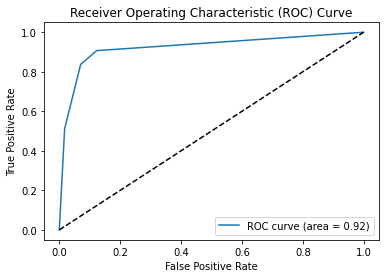

In [174]:
#i. Analyse for which K value, the classification algorithm provides better performance.
import matplotlib.pyplot as plt
y_pred_proba = knn.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])
auc_score = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [175]:
print("Confusion Matrix:\n", conf_matrix)
print("Accuracy: ", accuracy*100)
print("Specificity: ", specificity)
print("Recall: ", recall)
print("Precision: ", precision)
print("F1-score: ", f1_score)
print("Classification Report:\n", report)
print("AUC score: ", auc_score)
print("True positive: ",tp)
print("True negative: ", tn)

Confusion Matrix:
 [[53  7]
 [ 4 36]]
Accuracy:  89.0
Specificity:  0.8833333333333333
Recall:  0.9
Precision:  0.8372093023255814
F1-score:  0.8674698795180723
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.91        57
           1       0.90      0.84      0.87        43

    accuracy                           0.89       100
   macro avg       0.89      0.88      0.89       100
weighted avg       0.89      0.89      0.89       100

AUC score:  0.9222766217870256
True positive:  36
True negative:  53


#Thank You!